In [1]:
pip install selenium beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install seaborn

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

service = Service(executable_path=r"C:\WebDriver\chromedriver-win64\chromedriver.exe")
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')  # Headless kapalı

driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)

markalar_modeller = {
    "volkswagen": ["golf", "passat", "polo", "tiguan"],
    "audi": ["a3", "a4", "a6", "q5"],
    "bmw": ["3-serisi", "5-serisi", "x1", "x3"],
    "mercedes-benz": ["c-200", "e-200", "cla-200", "gla-200"],
    
}
data_list = []

try:
    for marka, modeller in markalar_modeller.items():
        for model in modeller:
            ilan_sayisi = 0
            sayfa = 1
            print(f"🚗 {marka.upper()} {model.upper()} başlatıldı.")

            while ilan_sayisi < 20:
                url = f"https://www.arabam.com/ikinci-el/{marka}/{model}?page={sayfa}"
                driver.get(url)
                print(f"🔄 Sayfa açıldı: {url}")
                time.sleep(2)

                try:
                    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "tr[class*='listing-list-item']")))
                except:
                    print("❌ İlan listesi yüklenemedi.")
                    break

                ilanlar = driver.find_elements(By.CSS_SELECTOR, "tr[class*='listing-list-item']")

                if not ilanlar:
                    break

                for ilan in ilanlar:
                    if ilan_sayisi >= 20:
                        break
                    try:
                        bilgiler = {
                            "Marka": marka.capitalize(),
                            "Model": model.upper()
                        }
                        sutunlar = ilan.find_elements(By.TAG_NAME, "td")
                        if len(sutunlar) >= 6:
                            bilgiler["Yil"] = sutunlar[1].text
                            bilgiler["Kilometre"] = sutunlar[2].text
                            bilgiler["Vites"] = sutunlar[3].text
                            bilgiler["Yakit Turu"] = sutunlar[4].text
                            bilgiler["Fiyat (TL)"] = sutunlar[5].text.replace("TL", "").replace(".", "").strip()
                            data_list.append(bilgiler)
                            ilan_sayisi += 1
                            print(f"✅ {ilan_sayisi}/20")
                    except Exception as e:
                        print(f"⚠️ İlan hatası: {e}")
                        continue

                sayfa += 1
                time.sleep(1)

finally:
    df = pd.DataFrame(data_list)
    df.to_csv("arabakayit.csv", index=False, encoding="utf-8-sig")
    print("✅ CSV dosyası oluşturuldu.")
    driver.quit()


🚗 VOLKSWAGEN GOLF başlatıldı.
🔄 Sayfa açıldı: https://www.arabam.com/ikinci-el/volkswagen/golf?page=1
✅ 1/20
✅ 2/20
✅ 3/20
✅ 4/20
✅ 5/20
✅ 6/20
✅ 7/20
✅ 8/20
✅ 9/20
✅ 10/20
✅ 11/20
✅ 12/20
✅ 13/20
✅ 14/20
✅ 15/20
✅ 16/20
✅ 17/20
✅ 18/20
✅ 19/20
✅ 20/20
🚗 VOLKSWAGEN PASSAT başlatıldı.
🔄 Sayfa açıldı: https://www.arabam.com/ikinci-el/volkswagen/passat?page=1
✅ 1/20
✅ 2/20
✅ 3/20
✅ 4/20
✅ 5/20
✅ 6/20
✅ 7/20
✅ 8/20
✅ 9/20
✅ 10/20
✅ 11/20
✅ 12/20
✅ 13/20
✅ 14/20
✅ 15/20
✅ 16/20
✅ 17/20
✅ 18/20
✅ 19/20
✅ 20/20
🚗 VOLKSWAGEN POLO başlatıldı.
🔄 Sayfa açıldı: https://www.arabam.com/ikinci-el/volkswagen/polo?page=1
✅ 1/20
✅ 2/20
✅ 3/20
✅ 4/20
✅ 5/20
✅ 6/20
✅ 7/20
✅ 8/20
✅ 9/20
✅ 10/20
✅ 11/20
✅ 12/20
✅ 13/20
✅ 14/20
✅ 15/20
✅ 16/20
✅ 17/20
✅ 18/20
✅ 19/20
✅ 20/20
🚗 VOLKSWAGEN TIGUAN başlatıldı.
🔄 Sayfa açıldı: https://www.arabam.com/ikinci-el/volkswagen/tiguan?page=1
✅ 1/20
✅ 2/20
✅ 3/20
✅ 4/20
✅ 5/20
✅ 6/20
✅ 7/20
✅ 8/20
✅ 9/20
✅ 10/20
✅ 11/20
✅ 12/20
✅ 13/20
✅ 14/20
✅ 15/20
✅ 16/20
✅ 17/20
✅ 18

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb


df = pd.read_excel(r"C:\Users\sevva\OneDrive\Masaüstü\arabakayitson.xlsx")
df.dropna(inplace=True)

for col in ["Marka", "Model", "Renk", "Vites_Tipi"]:
    df[col] = df[col].str.lower().str.strip()

from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in ["Marka", "Model", "Renk", "Vites_Tipi"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


X = df[["Marka", "Model", "Yıl", "Kilometre", "Renk", "Vites_Tipi"]]
y = df["Fiyat"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


importance = model.get_booster().get_score(importance_type='weight')
print("Feature Importances (weight):")
for k, v in importance.items():
    print(f"{k}: {v}")

joblib.dump(model, "fiyat_modeli_xgb.pkl")
joblib.dump(encoders, "encoderlar.pkl")


R2 Score: 0.8185
MSE: 149546221568.00
RMSE: 386712.07
Feature Importances (weight):
Marka: 446.0
Model: 396.0
Yıl: 624.0
Kilometre: 1243.0
Renk: 195.0
Vites_Tipi: 34.0


['encoderlar.pkl']

In [3]:
import joblib

model = joblib.load("fiyat_modeli_xgb.pkl")
encoders = joblib.load("encoderlar.pkl")


In [4]:

gelen_marka = "Volkswagen"
gelen_model = "PASSAT"
gelen_renk = "kırmızı"
gelen_vites = "Düz"
gelen_yil = 2015
gelen_kilometre = 120000

marka_enc = encoders["Marka"].transform([gelen_marka.lower().strip()])[0]
model_enc = encoders["Model"].transform([gelen_model.lower().strip()])[0]
renk_enc = encoders["Renk"].transform([gelen_renk.lower().strip()])[0]
vites_enc = encoders["Vites_Tipi"].transform([gelen_vites.lower().strip()])[0]

features = [[marka_enc, model_enc, gelen_yil, gelen_kilometre, renk_enc, vites_enc]]
tahmin = model.predict(features)[0]
print(f"Tahmini fiyat: {round(tahmin, 2)} TL")


Tahmini fiyat: 1250922.5 TL


In [5]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb


df = pd.read_excel(r"C:\Users\sevva\OneDrive\Masaüstü\arabakayitson.xlsx")
df.dropna(inplace=True)

for col in ["Marka", "Model", "Renk", "Vites_Tipi"]:
    df[col] = df[col].str.lower().str.strip()


encoders = {}
for col in ["Marka", "Model", "Renk", "Vites_Tipi"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df[["Marka", "Model", "Yıl", "Kilometre", "Renk", "Vites_Tipi"]]
y = df["Fiyat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


importance = model.get_booster().get_score(importance_type='weight')
print("Feature Importances (weight):")
for feat, score in importance.items():
    print(f"{feat}: {score}")

joblib.dump(model, "fiyat_modeli_xgb.pkl")
joblib.dump(encoders, "encoderlar.pkl")


R2 Score: 0.8185
MSE: 149546221568.00
RMSE: 386712.07
Feature Importances (weight):
Marka: 446.0
Model: 396.0
Yıl: 624.0
Kilometre: 1243.0
Renk: 195.0
Vites_Tipi: 34.0


['encoderlar.pkl']

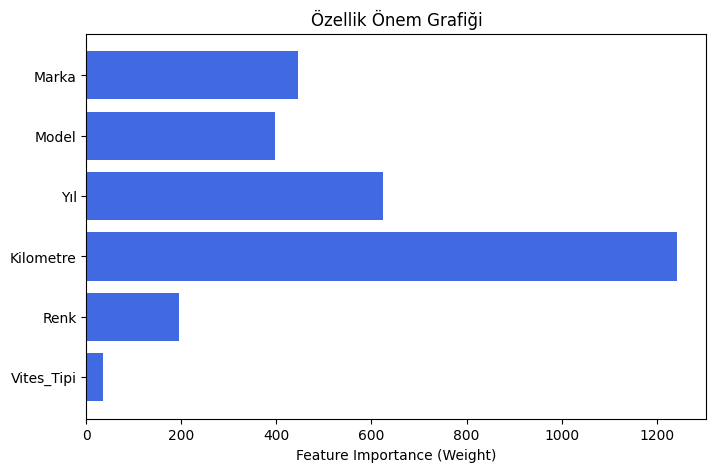

In [20]:
importance = model.get_booster().get_score(importance_type='weight')

importance_fixed = {}
for k, v in importance.items():
    if k.startswith('f'):
        idx = int(k[1:])
        feature_name = feature_names[idx]
    else:
        feature_name = k
    importance_fixed[feature_name] = v

features = list(importance_fixed.keys())
scores = list(importance_fixed.values())

plt.figure(figsize=(8,5))
plt.barh(features, scores, color='royalblue')
plt.xlabel("Feature Importance (Weight)")
plt.title("Özellik Önem Grafiği")
plt.gca().invert_yaxis()
plt.show()


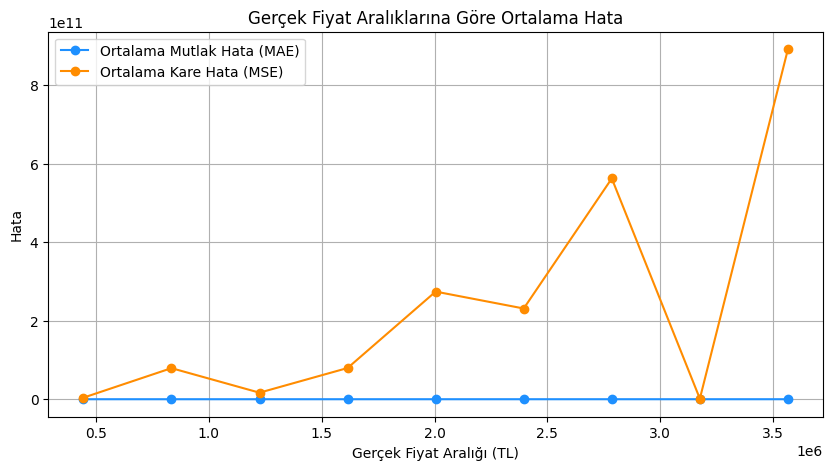

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

absolute_errors = np.abs(y_test - y_pred)
squared_errors = (y_test - y_pred) ** 2


bins = np.linspace(y_test.min(), y_test.max(), 10)  # 10 aralığa böl
bin_indices = np.digitize(y_test, bins)


mae_per_bin = []
mse_per_bin = []
bin_centers = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    if np.sum(mask) > 0:
        mae_per_bin.append(absolute_errors[mask].mean())
        mse_per_bin.append(squared_errors[mask].mean())
        bin_centers.append((bins[i] + bins[i-1]) / 2)

plt.figure(figsize=(10,5))
plt.plot(bin_centers, mae_per_bin, label="Ortalama Mutlak Hata (MAE)", color='dodgerblue', marker='o')
plt.plot(bin_centers, mse_per_bin, label="Ortalama Kare Hata (MSE)", color='darkorange', marker='o')
plt.xlabel("Gerçek Fiyat Aralığı (TL)")
plt.ylabel("Hata")
plt.title("Gerçek Fiyat Aralıklarına Göre Ortalama Hata")
plt.legend()
plt.grid(True)
plt.show()


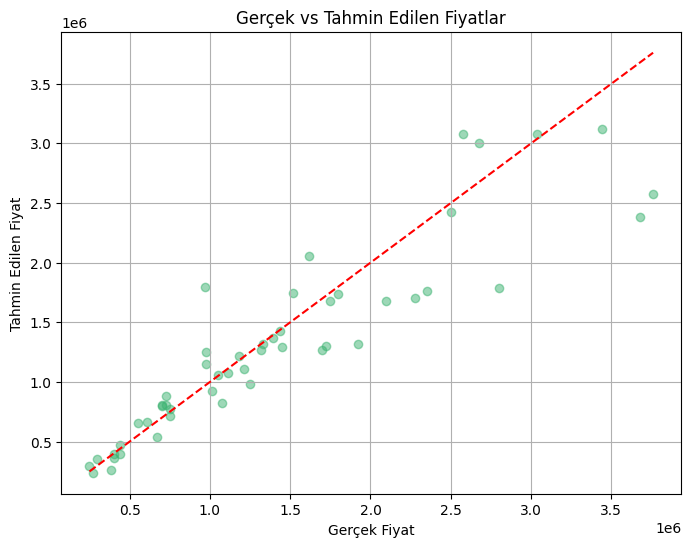

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.grid(True)
plt.show()


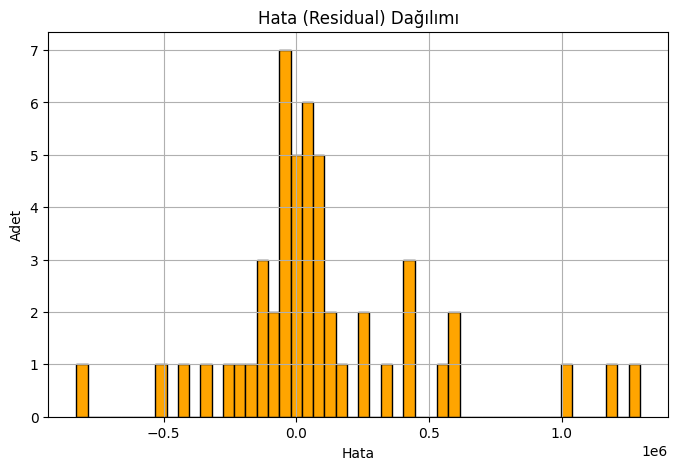

In [8]:
hatalar = y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(hatalar, bins=50, color='orange', edgecolor='black')
plt.title("Hata (Residual) Dağılımı")
plt.xlabel("Hata")
plt.ylabel("Adet")
plt.grid(True)
plt.show()


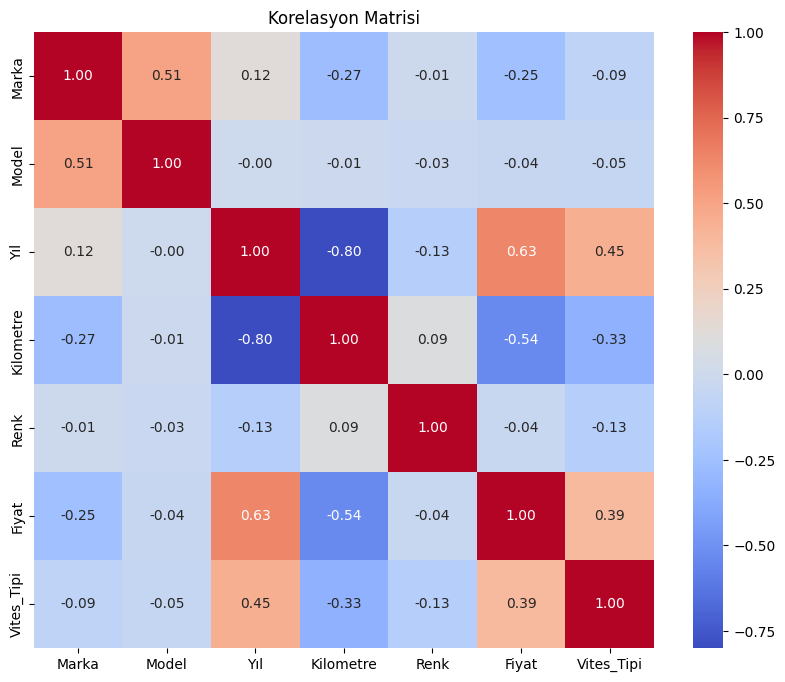

In [12]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


C:\Users\sevva\AppData\Local\Temp\ipykernel_15844\4294166479.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ortalama_hata = tahmin_df.groupby("Fiyat_Aralığı")["Hata"].mean()


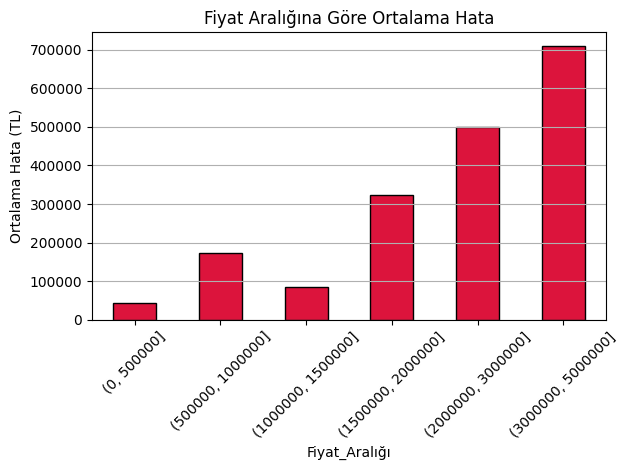

In [13]:
import pandas as pd

tahmin_df = pd.DataFrame({"Gerçek": y_test, "Tahmin": y_pred})
tahmin_df["Hata"] = abs(tahmin_df["Gerçek"] - tahmin_df["Tahmin"])
tahmin_df["Fiyat_Aralığı"] = pd.cut(tahmin_df["Gerçek"], bins=[0, 500000, 1000000, 1500000, 2000000, 3000000, 5000000])

ortalama_hata = tahmin_df.groupby("Fiyat_Aralığı")["Hata"].mean()

ortalama_hata.plot(kind='bar', color='crimson', edgecolor='black')
plt.title("Fiyat Aralığına Göre Ortalama Hata")
plt.ylabel("Ortalama Hata (TL)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [15]:
import joblib


encoders = joblib.load("encoderlar.pkl")
model = joblib.load("fiyat_modeli_xgb.pkl")

def encode_input(col_name, value):
    value = value.lower().strip()
    le = encoders.get(col_name) or encoders.get(col_name.lower())
    if le is None:
        print(f"Encoder bulunamadı: {col_name}")
        return None
    if value not in le.classes_:
        print(f"Uyarı: '{value}' {col_name} kategorisinde yok! Lütfen geçerli bir değer girin.")
        return None
    return le.transform([value])[0]

def main():
    while True:
        marka = input("Marka: ")
        marka_enc = encode_input("Marka", marka)
        if marka_enc is None:
            continue

        model_name = input("Model: ")
        model_enc = encode_input("Model", model_name)
        if model_enc is None:
            continue

        renk = input("Renk: ")
        renk_enc = encode_input("Renk", renk)
        if renk_enc is None:
            continue

        vites = input("Vites Tipi: ")
        vites_enc = encode_input("Vites_Tipi", vites)
        if vites_enc is None:
            continue

        try:
            yil = int(input("Yıl: "))
            km = int(input("Kilometre: "))
        except ValueError:
            print("Yıl ve Kilometre sayısal olmalı, tekrar deneyin.")
            continue

        features = [[marka_enc, model_enc, yil, km, renk_enc, vites_enc]]
        tahmin = model.predict(features)[0]
        print(f"\nTahmini fiyat: {round(tahmin, 2)} TL\n")

        devam = input("Başka tahmin yapmak ister misiniz? (e/h): ")
        if devam.lower() != "e":
            break

if __name__ == "__main__":
    main()


Marka:  BMW
Model:  320i
Renk:  siyah
Vites Tipi:  otomatik
Yıl:  2016
Kilometre:  107256



Tahmini fiyat: 1954027.375 TL



Başka tahmin yapmak ister misiniz? (e/h):  h
